# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 642


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city.replace(" ", "%20")  # Replace spaces with "%20" for URL encoding
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Check if the response is successful
        if response.status_code == 200:
            # Parse the JSON response
            city_weather = response.json()
            
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']
            
            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"No data found for {city}. Skipping...")
    
    except Exception as e:
        print(f"An error occurred while processing {city}: {str(e)}. Skipping...")
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | masinloc
Processing Record 7 of Set 1 | zhaodong
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | keflavik
Processing Record 11 of Set 1 | behror
Processing Record 12 of Set 1 | yalta
Processing Record 13 of Set 1 | luganville
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | strezhevoy
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | masterton
Processing Record 18 of Set 1 | kangding
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | hiratacho
Processing Record 22 of Set 1 | ha tinh
Processing Re

Processing Record 33 of Set 4 | avarua
Processing Record 34 of Set 4 | isafjordur
Processing Record 35 of Set 4 | zhangjiakou
Processing Record 36 of Set 4 | afaahiti
Processing Record 37 of Set 4 | piacabucu
Processing Record 38 of Set 4 | albany
Processing Record 39 of Set 4 | al jahra'
Processing Record 40 of Set 4 | kawambwa
Processing Record 41 of Set 4 | severo-yeniseyskiy
Processing Record 42 of Set 4 | vanino
Processing Record 43 of Set 4 | luza
Processing Record 44 of Set 4 | meraux
Processing Record 45 of Set 4 | qui nhon
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | castillos
Processing Record 48 of Set 4 | aral
Processing Record 49 of Set 4 | gorodishche
Processing Record 0 of Set 5 | sassandra
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | nouadhibou
Processing Record 3 of Set 5 | bafoulabe
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | bratsk
Processing Record 6 of Set 5 | luanda
Processing Record 7

Processing Record 22 of Set 8 | arkhangel'sk
Processing Record 23 of Set 8 | cockburn town
Processing Record 24 of Set 8 | kulhudhuffushi
Processing Record 25 of Set 8 | sabancuy
Processing Record 26 of Set 8 | tillaberi
Processing Record 27 of Set 8 | havre
Processing Record 28 of Set 8 | kingston
Processing Record 29 of Set 8 | toga village
No data found for toga village. Skipping...
Processing Record 30 of Set 8 | beloyarskiy
Processing Record 31 of Set 8 | ceeldheer
Processing Record 32 of Set 8 | chonchi
Processing Record 33 of Set 8 | rikaze
Processing Record 34 of Set 8 | guiren
Processing Record 35 of Set 8 | skiathos
Processing Record 36 of Set 8 | zhanaozen
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | shira
Processing Record 39 of Set 8 | valparaiso
Processing Record 40 of Set 8 | suntar
Processing Record 41 of Set 8 | karacabey
Processing Record 42 of Set 8 | jatiroto
Processing Record 43 of Set 8 | menaka
Processing Record 44 of Set 8 | susuman
Pro

Processing Record 11 of Set 12 | vernon
Processing Record 12 of Set 12 | pocatello
Processing Record 13 of Set 12 | olds
Processing Record 14 of Set 12 | naberera
Processing Record 15 of Set 12 | cintalapa de figueroa
Processing Record 16 of Set 12 | torghay
Processing Record 17 of Set 12 | thief river falls
Processing Record 18 of Set 12 | bodo
Processing Record 19 of Set 12 | timmins
Processing Record 20 of Set 12 | sorong
Processing Record 21 of Set 12 | rochester
Processing Record 22 of Set 12 | jinghong
Processing Record 23 of Set 12 | fada
Processing Record 24 of Set 12 | pointe aux piments
Processing Record 25 of Set 12 | fagaras
Processing Record 26 of Set 12 | benjamin constant
Processing Record 27 of Set 12 | santa terezinha
Processing Record 28 of Set 12 | tinogasta
Processing Record 29 of Set 12 | namtsy
Processing Record 30 of Set 12 | amungan
Processing Record 31 of Set 12 | makanya
Processing Record 32 of Set 12 | nobres
Processing Record 33 of Set 12 | sidi slimane
Proc

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,15.67,74,94,3.15,RU,1688508312
1,ancud,-41.8697,-73.8203,9.95,63,82,11.48,CL,1688508041
2,port-aux-francais,-49.3500,70.2167,4.87,79,67,16.31,TF,1688508312
3,hawaiian paradise park,19.5933,-154.9731,26.73,76,100,5.14,US,1688508313
4,san patricio,28.0170,-97.5169,36.05,44,26,8.24,US,1688508313


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,15.67,74,94,3.15,RU,1688508312
1,ancud,-41.8697,-73.8203,9.95,63,82,11.48,CL,1688508041
2,port-aux-francais,-49.3500,70.2167,4.87,79,67,16.31,TF,1688508312
3,hawaiian paradise park,19.5933,-154.9731,26.73,76,100,5.14,US,1688508313
4,san patricio,28.0170,-97.5169,36.05,44,26,8.24,US,1688508313


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

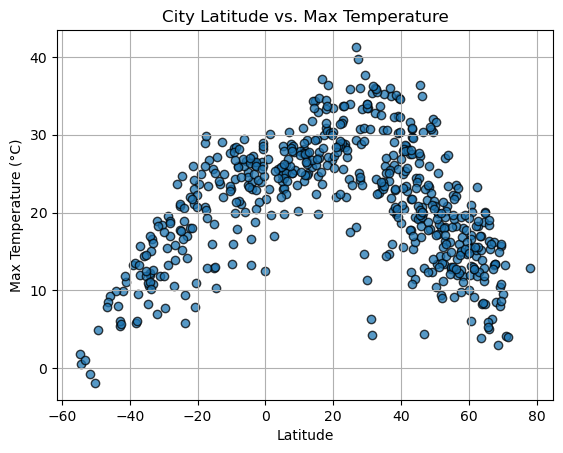

In [17]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

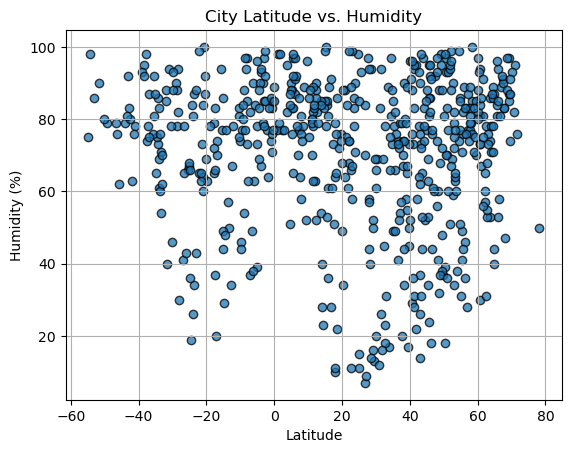

<Figure size 640x480 with 0 Axes>

In [18]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolor='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

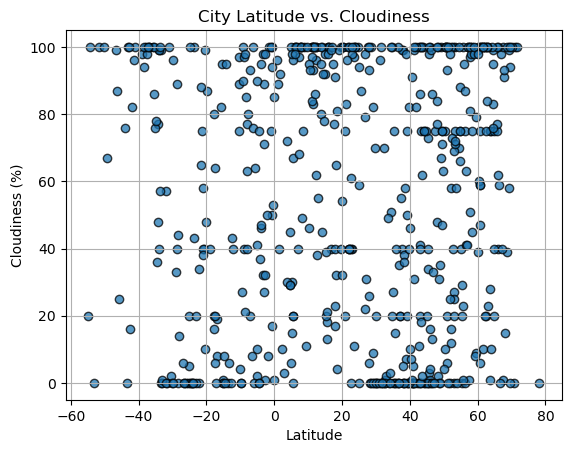

<Figure size 640x480 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

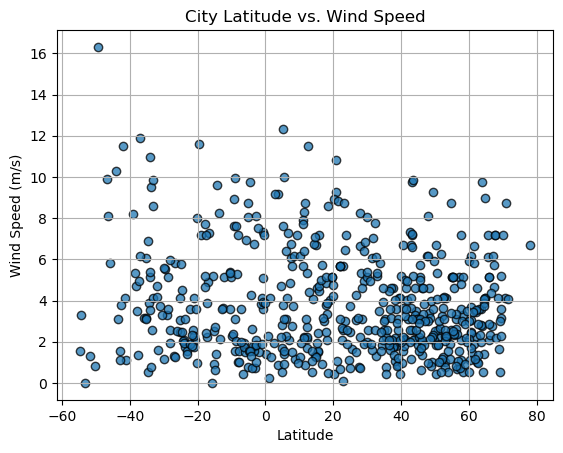

<Figure size 640x480 with 0 Axes>

In [20]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x,y):

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,15.67,74,94,3.15,RU,1688508312
3,hawaiian paradise park,19.5933,-154.9731,26.73,76,100,5.14,US,1688508313
4,san patricio,28.0170,-97.5169,36.05,44,26,8.24,US,1688508313
5,masinloc,15.5333,120.0500,19.87,84,18,1.51,PH,1688508313
6,zhaodong,46.0833,125.9833,20.72,86,100,4.62,CN,1688508313


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ancud,-41.8697,-73.8203,9.95,63,82,11.48,CL,1688508041
2,port-aux-francais,-49.3500,70.2167,4.87,79,67,16.31,TF,1688508312
7,blackmans bay,-43.0167,147.3167,5.41,92,100,1.55,AU,1688508314
8,west island,-12.1568,96.8225,24.99,78,40,5.14,CC,1688508314
12,luganville,-15.5333,167.1667,25.58,77,95,5.20,VU,1688508314


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.625526


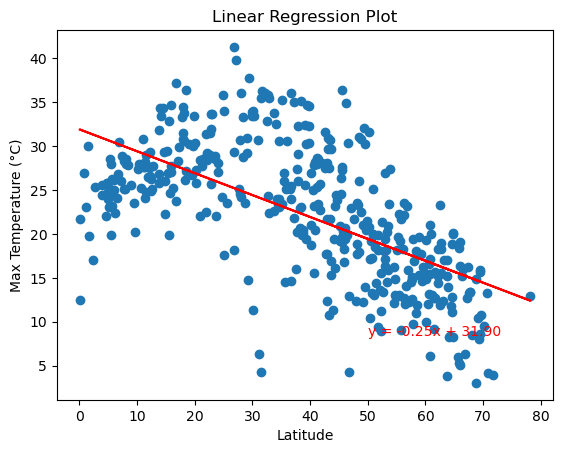

In [61]:
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (°C)")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
    
    # Show the plot
    plt.show()
x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Max Temp']
create_linear_regression_plot(x_northern, y_northern)

The r-value is: 0.816084


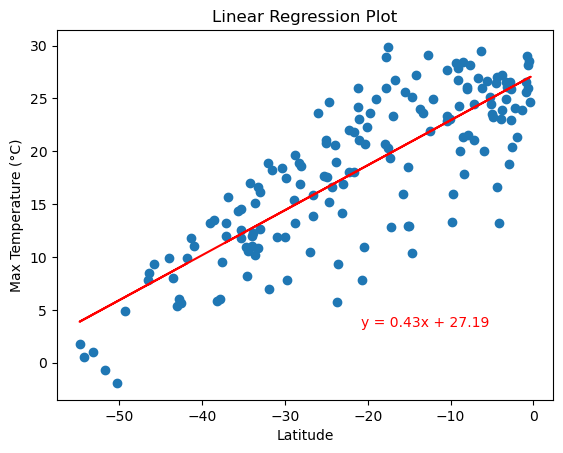

In [62]:
# Scatter plot for Southern Hemisphere data
    # Set the title and labels
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (°C)")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
plt.show()

x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Max Temp']
create_linear_regression_plot(x_southern, y_southern)

**Discussion about the linear relationship:** With what I can see from the graphs I made, there is correlation in both sets of data. The northern hemisphere shows a negative correlation, I believe this is because as you go through the northern hemisphere you start at 0 so it tends to have a warmer climate and as you go up on each latitude the temperature will start to reflect the cooler climate. As for the southern hemisphere, its essentially the same reason but with a positive correlation and going from the south pole up towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.011150


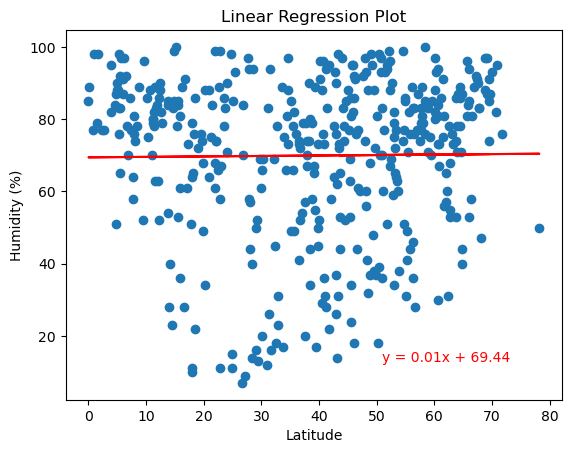

In [63]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
    
    # Show the plot
    plt.show()

# Scatter plot for Nouthern Hemisphere data
x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Humidity']
create_linear_regression_plot(x_northern, y_northern)

The r-value is: -0.050128


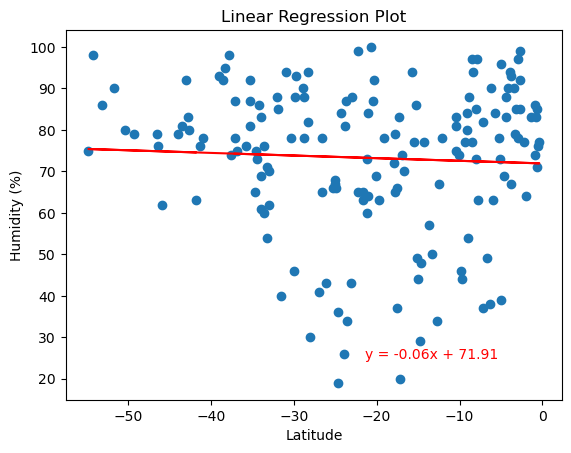

In [64]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
    
    # Show the plot
    plt.show()

# Scatter plot for Southern Hemisphere data
x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Humidity']
create_linear_regression_plot(x_southern, y_southern)

**Discussion about the linear relationship:** In both lineregressions the correlation of both are very low. Both are very close to 0 (meaning no correlation) while one is positive and one is negative, it doesn't give us any confidence in saying that humidity and latitude have very little correlation. I believe this is mostly adjusted by actual terrain of the area.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.041003


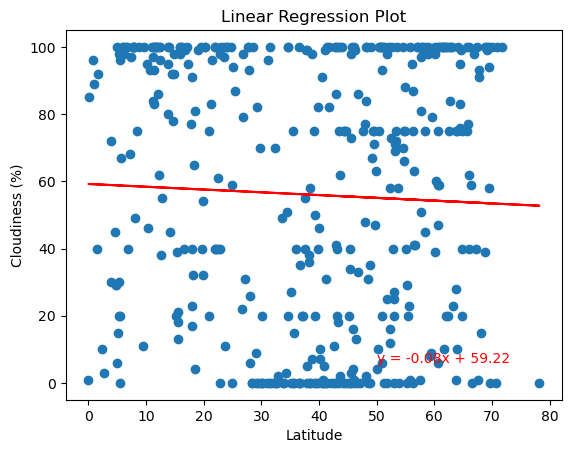

In [65]:
# Northern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
    
    # Show the plot
    plt.show()

x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Cloudiness']
create_linear_regression_plot(x_northern, y_northern)

The r-value is: -0.128132


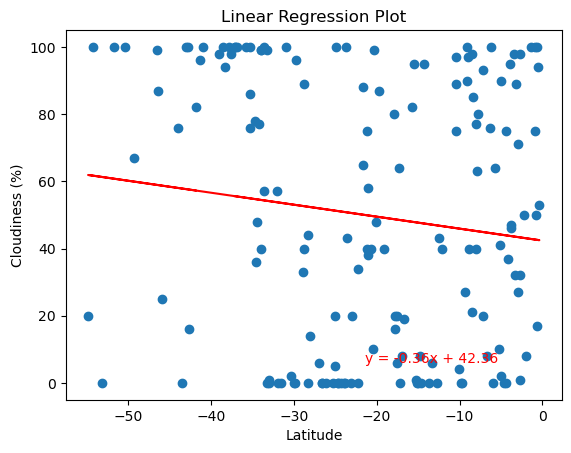

In [66]:
# Southern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
    
    # Show the plot
    plt.show()

x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Cloudiness']
create_linear_regression_plot(x_southern, y_southern)

**Discussion about the linear relationship:** With the first one, there is very little correlation, suggesting that there isnt much correlatioin between cloudiness and latitude in the northen hemisphere dataframe. With the second one there is a small correlation, which can indicate that closer to the equator there cloudiness is less in comparison to points further away from the equator

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.101882


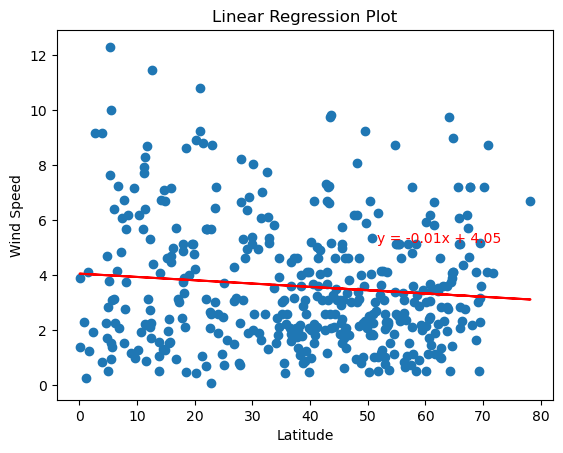

In [67]:
# Northern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
    
    # Show the plot
    plt.show()


x_northern = northern_hemi_df['Lat']
y_northern = northern_hemi_df['Wind Speed']
create_linear_regression_plot(x_northern, y_northern)

The r-value is: -0.118316


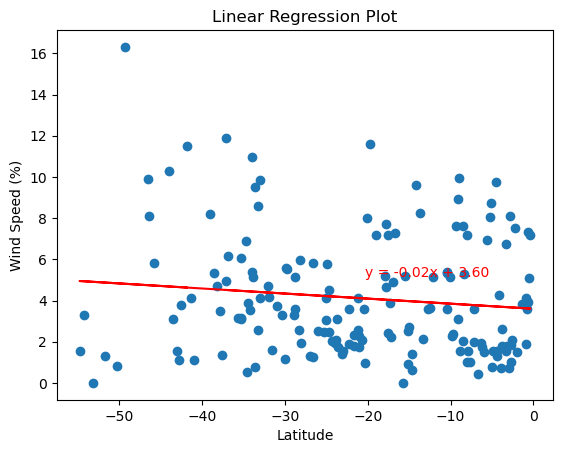

In [68]:
# Southern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, intercept + slope * x, color='red')

    # Set the title and labels
    plt.title("Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (%)")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.max() - 5, y.min() + 5, equation, color='red', ha='right', va='bottom')
    print(f"The r-value is: {rvalue:f}")
    
    # Show the plot
    plt.show()


x_southern = southern_hemi_df['Lat']
y_southern = southern_hemi_df['Wind Speed']
create_linear_regression_plot(x_southern, y_southern)

**Discussion about the linear relationship:** For both charts there is a small negative correlation which is a low r-value, but it can indicate that areas closer to the equator the less the windspeed, but for the northern hemisphere it looks like its actually inverse from the southern hemisphere.